# Final Project : Credit Card Fraud Detection

# What is my Problem statement

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# From Where I got the Data

The problem statement and the data was given in kaggale.      
link : https://www.kaggle.com/dalpozz/creditcardfraud

# What am I going to do

I am going to build a model to predict the fraud and normal transactions. I will build two models and check which one         gives me high accuracy.

# How am I going to do

Step-1 : Data exploration.     
step-2 : Preprocessing the data (remove outliers and Re-sampling).       
step-3 : build the model and  check accuracy.      


# Algorithms and Valuation metrics Used

Algorithms: Logistic regression and Random Forest classifier.       
Valuation Metrics: Precision, recall, Confusion matrix.     

# Step-1 : Data exploration

In [5]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:\Users\Sheshank\Desktop\Big Data\creditcard.csv",header = 0)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Checking for Null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Checking the class distribution

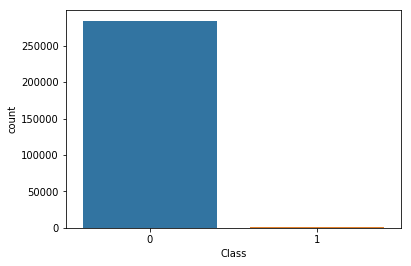

In [7]:
sns.countplot("Class",data=data)

From the above graph, We can say that data is imbalanced. So we have to balance the data which means we should Resample the data. Before that lets check for any outliers and remove them.

# Checking for Outliers

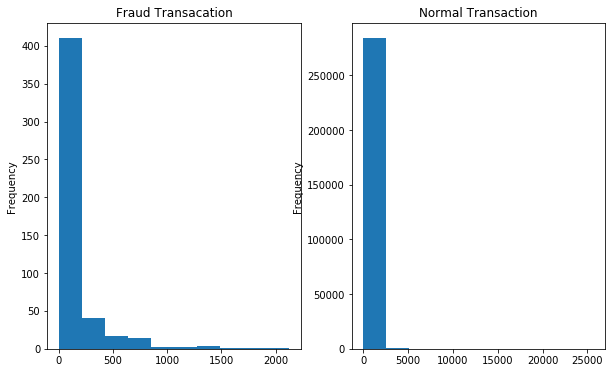

In [8]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

From the above graph, Distribution for Normal transction is not clear and it seams that all transaction are less than 2000.

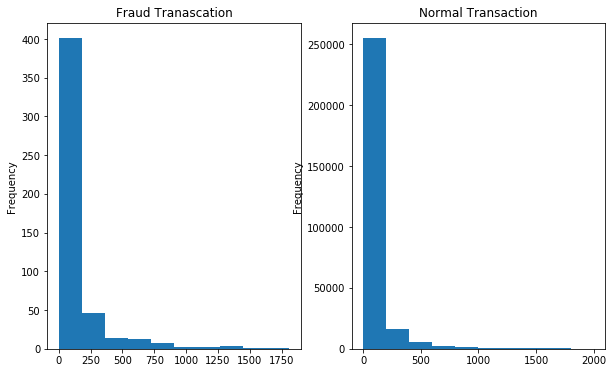

In [9]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2000].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2000].Amount.plot.hist(title="Normal Transaction")

Now we should resample the data to make the data balanced.

In [10]:

def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)

    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    print("\n-----Accuracy------- ")
    print(accuracy_score(labels_test,pred, normalize=True, sample_weight=None))

In [25]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so making a function
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

# ReSampling - Over Sampling using SMOTE

link : https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/


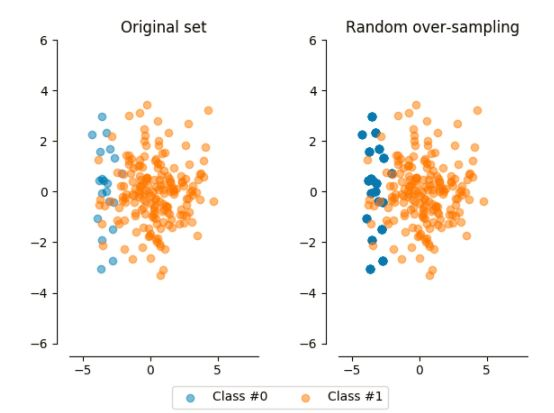

In [12]:
from IPython.display import Image
Image(filename='C:\\Users\\Sheshank\\Desktop\\Big Data\\os.jpg') 

In [26]:
# Lets Use SMOTE for Sampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# Calling our method data prepration on our dataset
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
columns = data_train_X.columns

length of training data
199364
length of test data
85443


In [14]:
# now using SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("No.of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))


('length of oversampled data is ', 398018)
('Number of normal transcation in oversampled data', 199009)
('No.of fraud transcation', 199009)


In [15]:
# normalising the amount
os_data_X["Normalized Amount"] = StandardScaler().fit_transform(os_data_X['Amount'].reshape(-1, 1))
os_data_X.drop(["Time","Amount"],axis=1,inplace=True)
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].reshape(-1, 1))
data_test_X.drop(["Time","Amount"],axis=1,inplace=True)

# Precision and Re-call

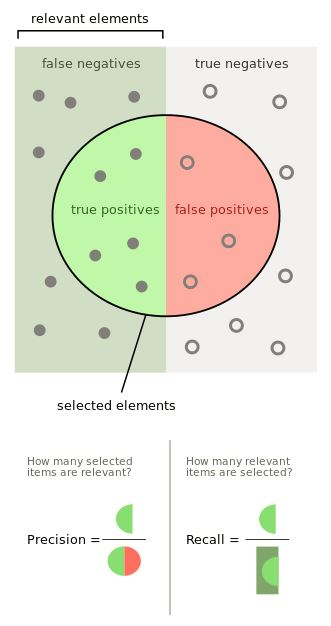

In [16]:
Image(filename='C:\\Users\\Sheshank\\Desktop\\Big Data\\pr.jpg') 

Precision is calculated as the number of correct positive predictions divided by the total number of positive predictions. It is also called positive predictive value (PPV). The best precision is 1.0, whereas the worst is 0.0.     

Sensitivity is calculated as the number of correct positive predictions divided by the total number of positives. It is also called recall (REC) or true positive rate (TPR). The best sensitivity is 1.0, whereas the worst is 0.0.

# f-score

F-score is a harmonic mean of precision and recall. F1 score conveys the balance between the precision and the recall.

# support

Support is an indication of how frequently the items appear in the dataset

# Random Forest Classifier

link : http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/    
https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/

It is both classification and regression algorithm

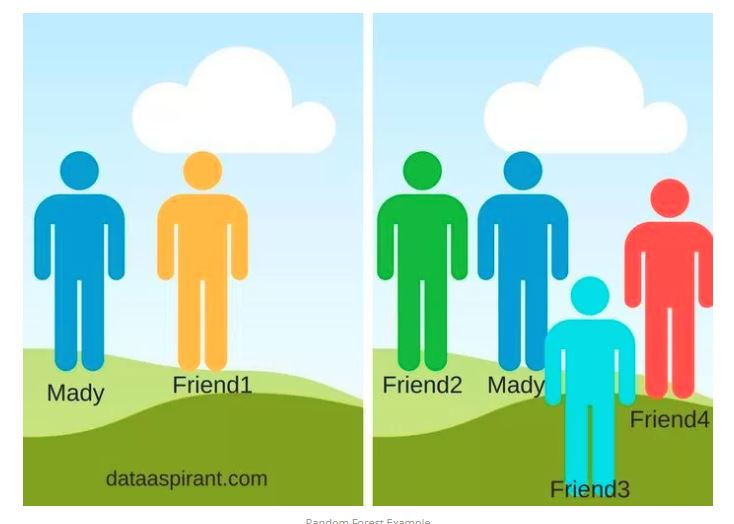

In [17]:
Image(filename='C:\\Users\\Sheshank\\Desktop\\Big Data\\randomforest.jpg') 

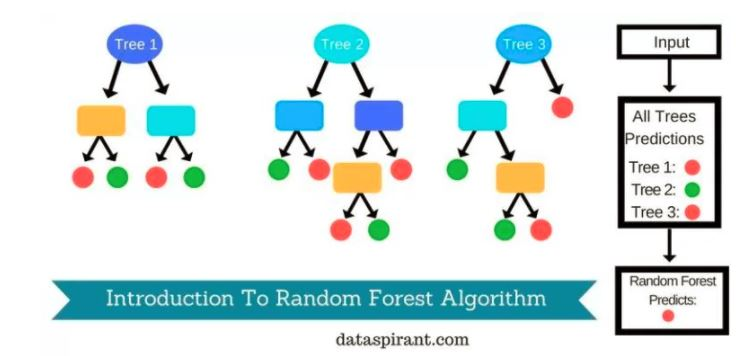

In [18]:
Image(filename='C:\\Users\\Sheshank\\Desktop\\Big Data\\randomforest1.jpg') 

('TP', 108)
('TN', 85281)
('FP', 25)
('FN', 29)


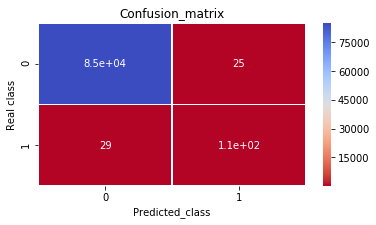


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85306
          1       0.81      0.79      0.80       137

avg / total       1.00      1.00      1.00     85443


-----Accuracy------- 
0.999367999719


In [19]:
#modeling
clf= RandomForestClassifier(n_estimators=100)
# train data using oversampled data and predict for the test data
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

# Logistic Regression

http://dataaspirant.com/2017/04/15/implement-logistic-regression-model-python-binary-classification/     
    http://dataaspirant.com/2017/03/02/how-logistic-regression-model-works/

# What is logistic regression

It is a binary classification algorithm.

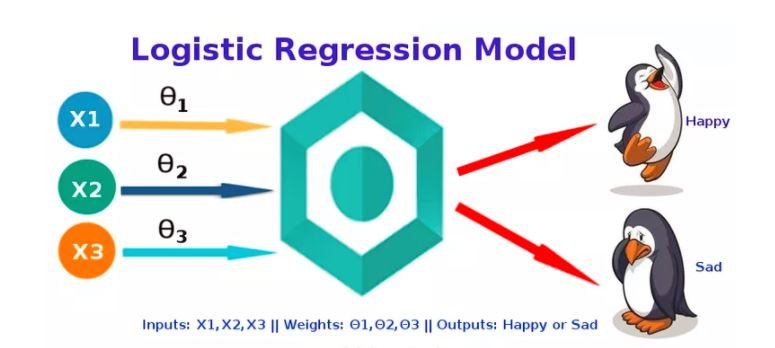

In [20]:
Image(filename='C:\Users\Sheshank\Desktop\Big Data\logistic1.jpg') 

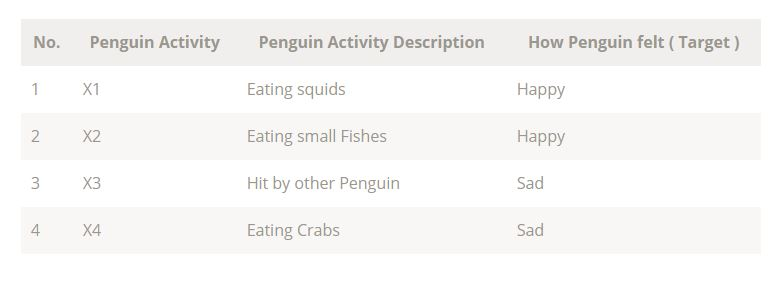

In [21]:
Image(filename='C:\Users\Sheshank\Desktop\Big Data\logistic2.jpg') 

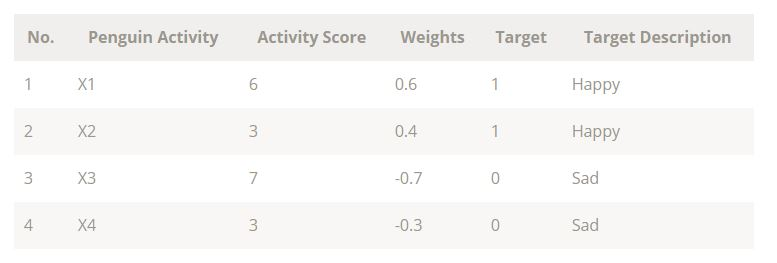

In [22]:
Image(filename='C:\Users\Sheshank\Desktop\Big Data\logistic3.jpg') 

It means to say if the penguin performs the activity X1 the model is 60% confident to say the penguin will be happy.    
If you observe the weights for the target class happy are positive, and the weights for the target class sad are negative.

# What is logits

 To predict how the penguin will feel given the activity we just need to multiply the activity score and the corresponding weight to get the score. The calculated score is also known as the logits.

From the values of logits, We calculate the values of softmax function.    
Softmax function is the popular function to calculate the probabilities of the events. The other mathematical advantages of using the softmax function are the output range.  Softmax function output values are always in the range of (0, 1). The sum of the output values will always equal to the 1. The Softmax is also known as the normalized exponential function.

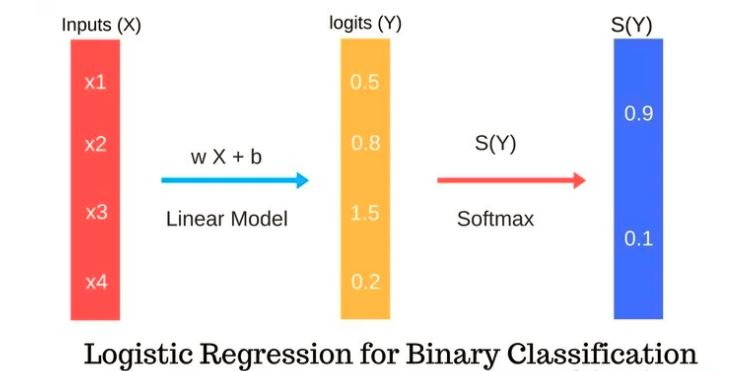

In [23]:
Image(filename='C:\Users\Sheshank\Desktop\Big Data\logistic4.jpg') 

('TP', 118)
('TN', 84652)
('FP', 654)
('FN', 19)


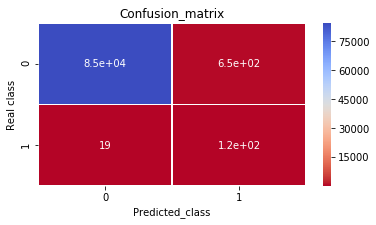


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85306
          1       0.15      0.86      0.26       137

avg / total       1.00      0.99      0.99     85443


-----Accuracy------- 
0.992123403907


In [24]:
clf=LogisticRegression()
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

# Conclusion

Both the algorithms gives me high accuracy, Random forest with 99.9% and logistic regression with 99.2%. So if we have to choose one I would choose Random forest for my credit card fraud detection.